# Convolution 2D
<p align="left">
<img src="./img/businesscard.jpg" width="500px" alt="Business Card" align="left" >
</p>
<br>

[www.rptecnologias.com](http://www.rptecnologias.com)
<br>
guitars.ai@rptecnologias.com


## Imports & Configurations

In [1]:
# General Imports
import numpy as np
import scipy.signal as signal

#Display ang Plots
#%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display
from displayUtils import show_web
# Logging & Debbuging
import logging

In [2]:
# Logging Configuration
import sys
# Create logger
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
logger = logging.getLogger()

# Create STDERR handler
handler = logging.StreamHandler(sys.stderr)

# Set STDERR handler as the only handler 
logger.handlers = [handler]

In [3]:
show_web("https://en.wikipedia.org/wiki/Multidimensional_discrete_convolution#Definition")

$$ 
\Large
\begin{equation}
f\left[x,y \right] * g\left[x,y \right] =  \sum_{i=-\infty}^{+\infty}\sum_{j=-\infty}^{+\infty} f\left[i,j \right] \cdot g\left[x-i,y-j \right]
\end{equation}$$

## Scipy Convolution 2D

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 3, 3, 3, 3, 3, 3, 1],
       [1, 3, 1, 1, 3, 1, 1, 1],
       [1, 3, 3, 3, 3, 3, 3, 1],
       [1, 3, 1, 1, 3, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]])

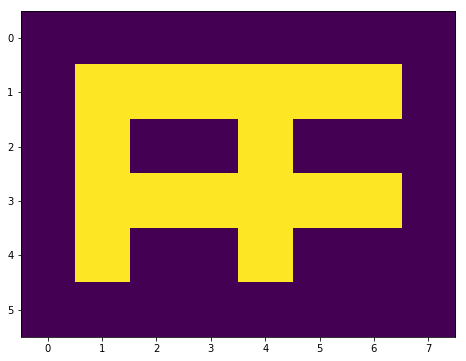

In [4]:
# Test Matrices
input_matrix=np.array([
    [1,1,1,1,1,1,1,1],
    [1,3,3,3,3,3,3,1],
    [1,3,1,1,3,1,1,1],
    [1,3,3,3,3,3,3,1],
    [1,3,1,1,3,1,1,1],
    [1,1,1,1,1,1,1,1]])
plt.figure(figsize=(8,6))
plt.imshow(input_matrix)
input_matrix

array([[-1, -1, -1],
       [ 2,  2,  2],
       [-1, -1, -1]])

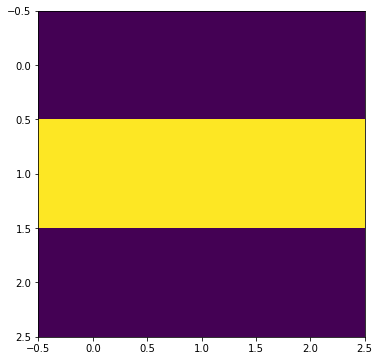

In [5]:
convolution_kernel=np.array([
    [-1,-1,-1],
    [2,2,2],
    [-1,-1,-1]
])
plt.figure(figsize=(8,6))
plt.imshow(convolution_kernel)
convolution_kernel

array([[-1, -2, -3, -3, -3, -3, -3, -3, -2, -1],
       [ 1,  0, -1, -3, -3, -3, -3, -1,  0,  1],
       [ 0,  2,  6, 10, 10, 10, 10,  8,  4,  0],
       [ 0,  0, -4, -8, -8, -8, -8, -8, -4,  0],
       [ 0,  0,  4,  8,  8,  8,  8,  8,  4,  0],
       [ 0,  2,  0, -2, -2, -2, -2, -4, -2,  0],
       [ 1,  0,  1,  1,  1,  1,  1,  3,  2,  1],
       [-1, -2, -3, -3, -3, -3, -3, -3, -2, -1]])

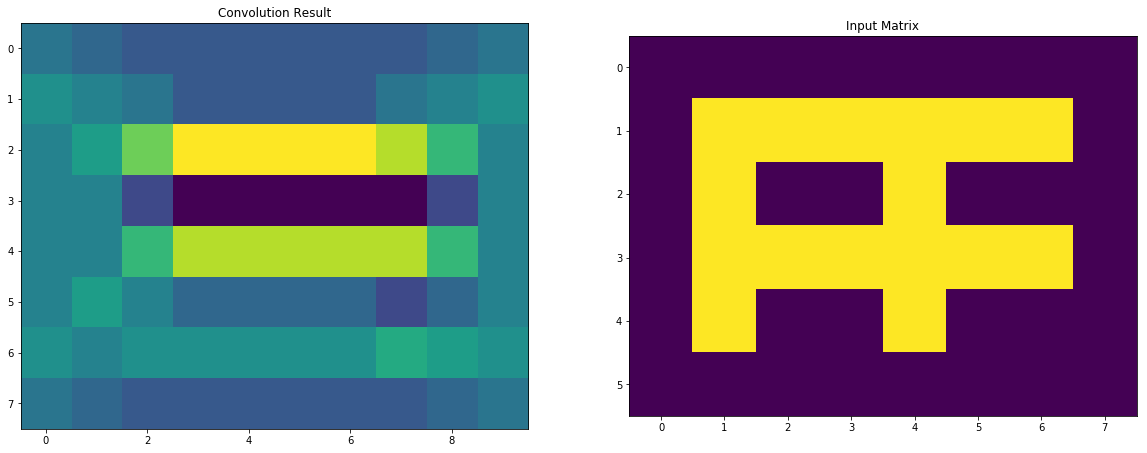

In [6]:
# Scipy Convolution
conv_result=signal.convolve2d(input_matrix,convolution_kernel,mode='full')
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(conv_result)
plt.title("Convolution Result")
plt.subplot(1,2,2)
plt.imshow(input_matrix)
plt.title("Input Matrix")
conv_result

## Python: Convolution 2D

In [7]:
def Convolution2D(f,g):
    result=np.zeros((f.shape[0]+g.shape[0]-1, f.shape[1]+g.shape[1]-1))
    for x in range(f.shape[0]):
        for y in range (f.shape[1]):
            for i in range(g.shape[0]):
                for j in range(g.shape[1]):
                    result[x+i][y+j]+=f[x][y]*g[i][j]
                      
    return result

array([[-1., -2., -3., -3., -3., -3., -3., -3., -2., -1.],
       [ 1.,  0., -1., -3., -3., -3., -3., -1.,  0.,  1.],
       [ 0.,  2.,  6., 10., 10., 10., 10.,  8.,  4.,  0.],
       [ 0.,  0., -4., -8., -8., -8., -8., -8., -4.,  0.],
       [ 0.,  0.,  4.,  8.,  8.,  8.,  8.,  8.,  4.,  0.],
       [ 0.,  2.,  0., -2., -2., -2., -2., -4., -2.,  0.],
       [ 1.,  0.,  1.,  1.,  1.,  1.,  1.,  3.,  2.,  1.],
       [-1., -2., -3., -3., -3., -3., -3., -3., -2., -1.]])

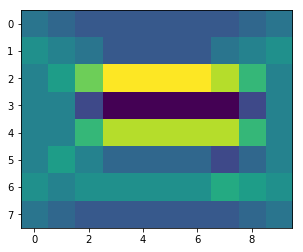

In [8]:
plt.figure()
conv2Dresult=Convolution2D(input_matrix,convolution_kernel)
plt.imshow(conv2Dresult)
conv2Dresult